In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.datasets import  load_wine

In [3]:
wine = load_wine()
wine_feature = wine.feature_names
wine_data = pd.DataFrame(wine.data, columns = wine_feature)
wine_label = pd.DataFrame(wine.target, columns = ['label'])

In [4]:
wine_data.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [5]:
wine_data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [6]:
wine_data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
data = pd.concat([wine_data, wine_label],axis = 1)

In [8]:
wine_feature

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine_outcome = pd.crosstab(index = data['label'], columns = "count")

wine_outcome

col_0  count
label       
0         59
1         71
2         48

In [10]:
data_setosa = data.loc[data['label'] == 0]
data_virginica = data.loc[data['label'] == 1]
data_versicolor = data.loc[data['label'] == 2]

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot`

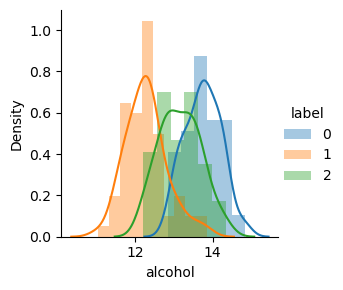

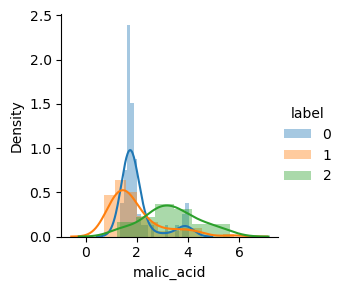

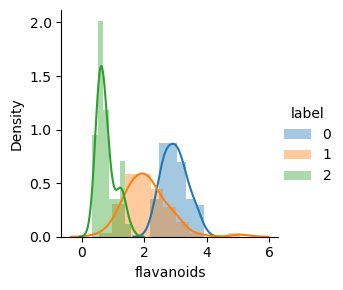

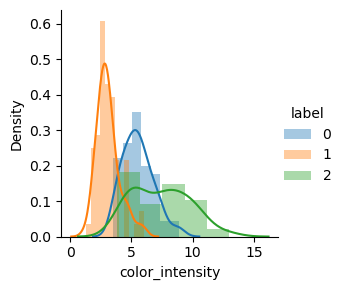

In [11]:
sns.FacetGrid(data, hue="label",size=3).map(sns.distplot,"alcohol").add_legend()
sns.FacetGrid(data, hue="label",size=3).map(sns.distplot,"malic_acid").add_legend()
sns.FacetGrid(data, hue="label",size=3).map(sns.distplot,"flavanoids").add_legend()
sns.FacetGrid(data, hue="label",size=3).map(sns.distplot,"color_intensity").add_legend()
plt.show()

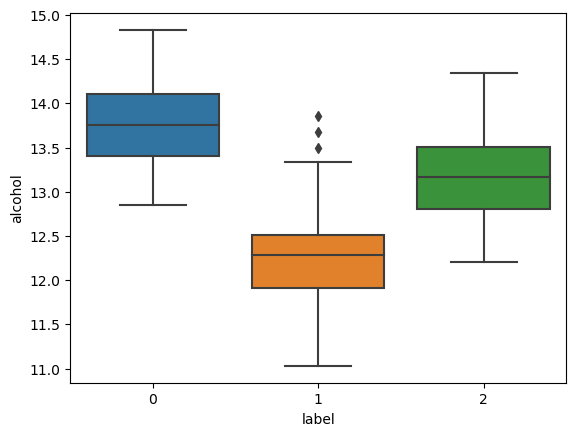

In [12]:
sns.boxplot(x='label', y='alcohol', data=data)
plt.show()

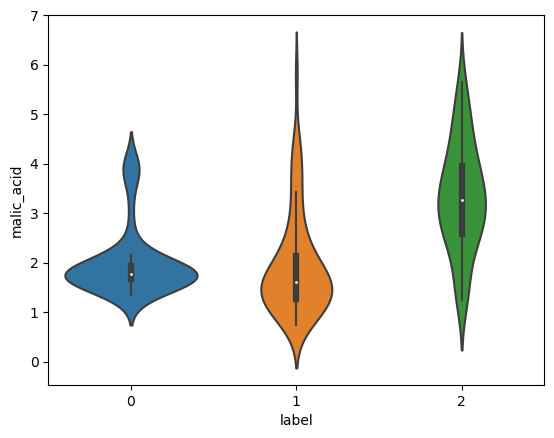

In [13]:
sns.violinplot(x="label",y="malic_acid",data=data)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


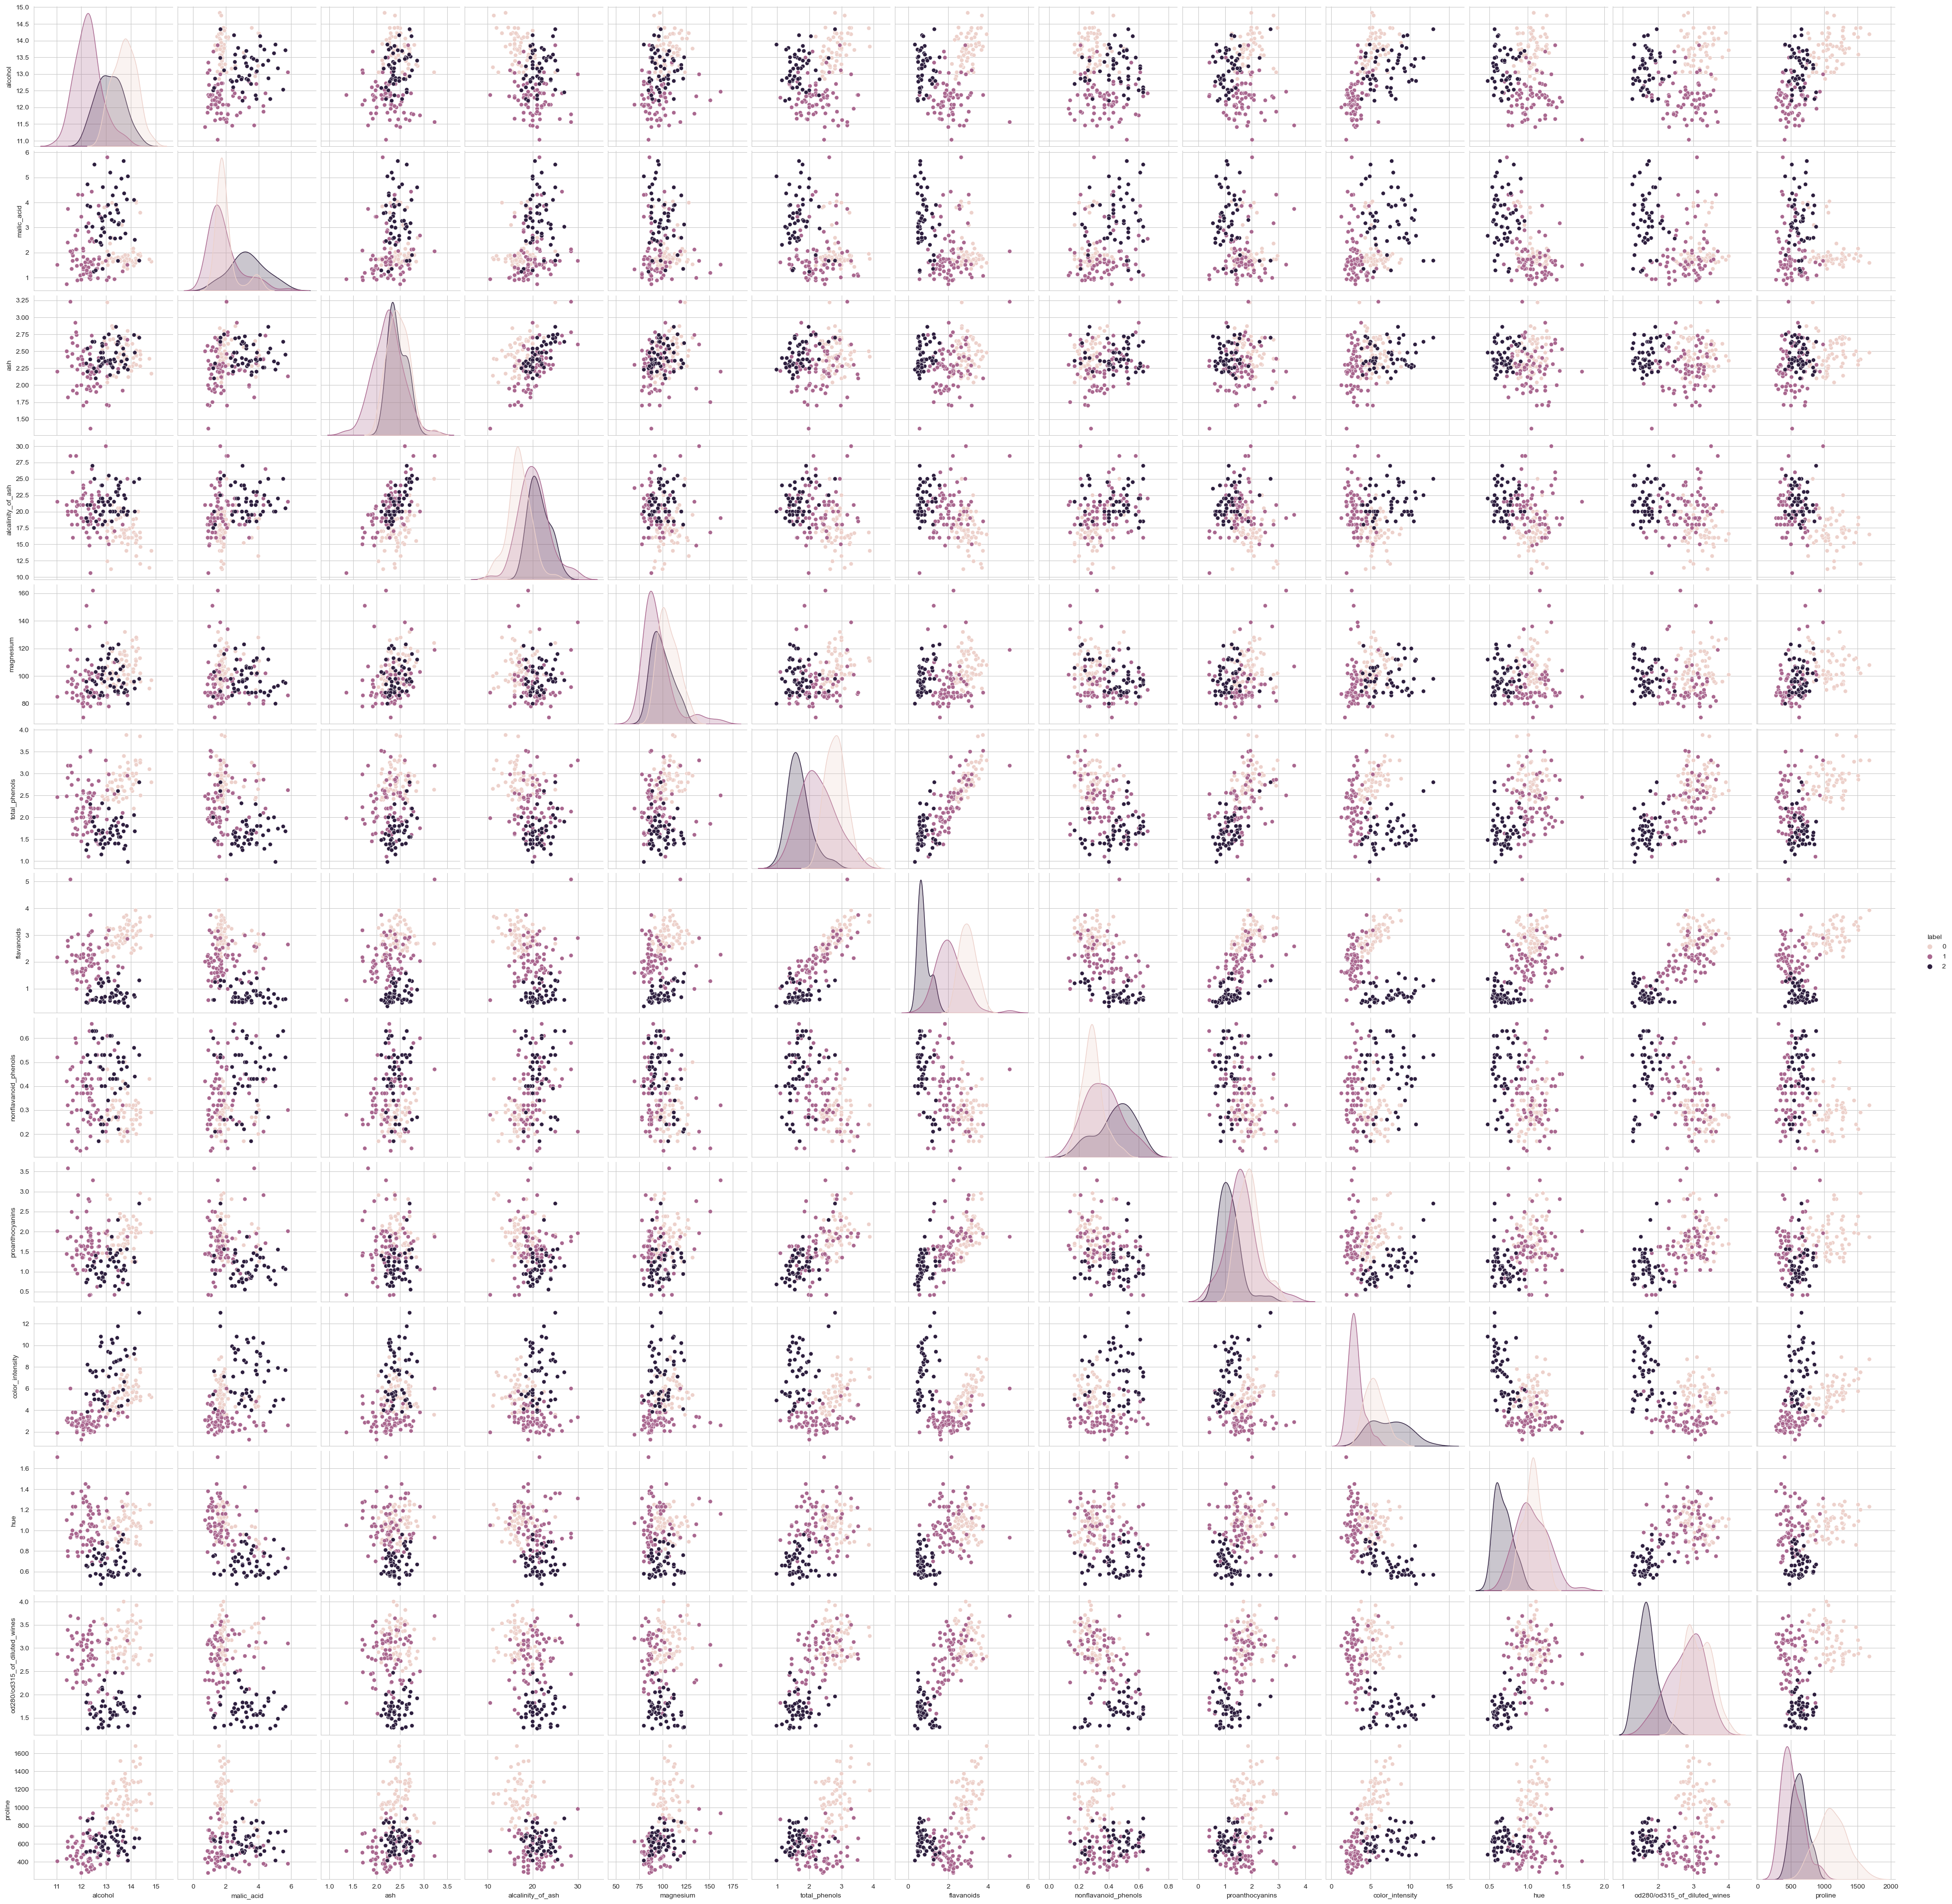

In [14]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="label",size=3);
plt.show()

In [17]:
x = data.iloc[:, [0,1,2,3]].values

In [18]:
x

array([[14.23,  1.71,  2.43, 15.6 ],
       [13.2 ,  1.78,  2.14, 11.2 ],
       [13.16,  2.36,  2.67, 18.6 ],
       [14.37,  1.95,  2.5 , 16.8 ],
       [13.24,  2.59,  2.87, 21.  ],
       [14.2 ,  1.76,  2.45, 15.2 ],
       [14.39,  1.87,  2.45, 14.6 ],
       [14.06,  2.15,  2.61, 17.6 ],
       [14.83,  1.64,  2.17, 14.  ],
       [13.86,  1.35,  2.27, 16.  ],
       [14.1 ,  2.16,  2.3 , 18.  ],
       [14.12,  1.48,  2.32, 16.8 ],
       [13.75,  1.73,  2.41, 16.  ],
       [14.75,  1.73,  2.39, 11.4 ],
       [14.38,  1.87,  2.38, 12.  ],
       [13.63,  1.81,  2.7 , 17.2 ],
       [14.3 ,  1.92,  2.72, 20.  ],
       [13.83,  1.57,  2.62, 20.  ],
       [14.19,  1.59,  2.48, 16.5 ],
       [13.64,  3.1 ,  2.56, 15.2 ],
       [14.06,  1.63,  2.28, 16.  ],
       [12.93,  3.8 ,  2.65, 18.6 ],
       [13.71,  1.86,  2.36, 16.6 ],
       [12.85,  1.6 ,  2.52, 17.8 ],
       [13.5 ,  1.81,  2.61, 20.  ],
       [13.05,  2.05,  3.22, 25.  ],
       [13.39,  1.77,  2.62, 16.1 ],
 

In [19]:
from sklearn.cluster import KMeans
wcss = []

In [20]:
from sklearn.cluster import KMeans
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

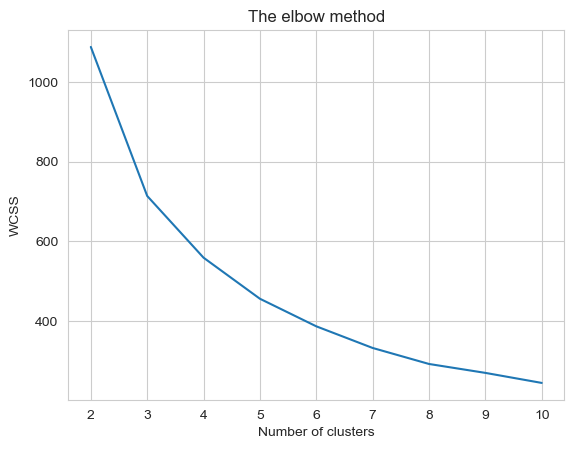

In [21]:
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

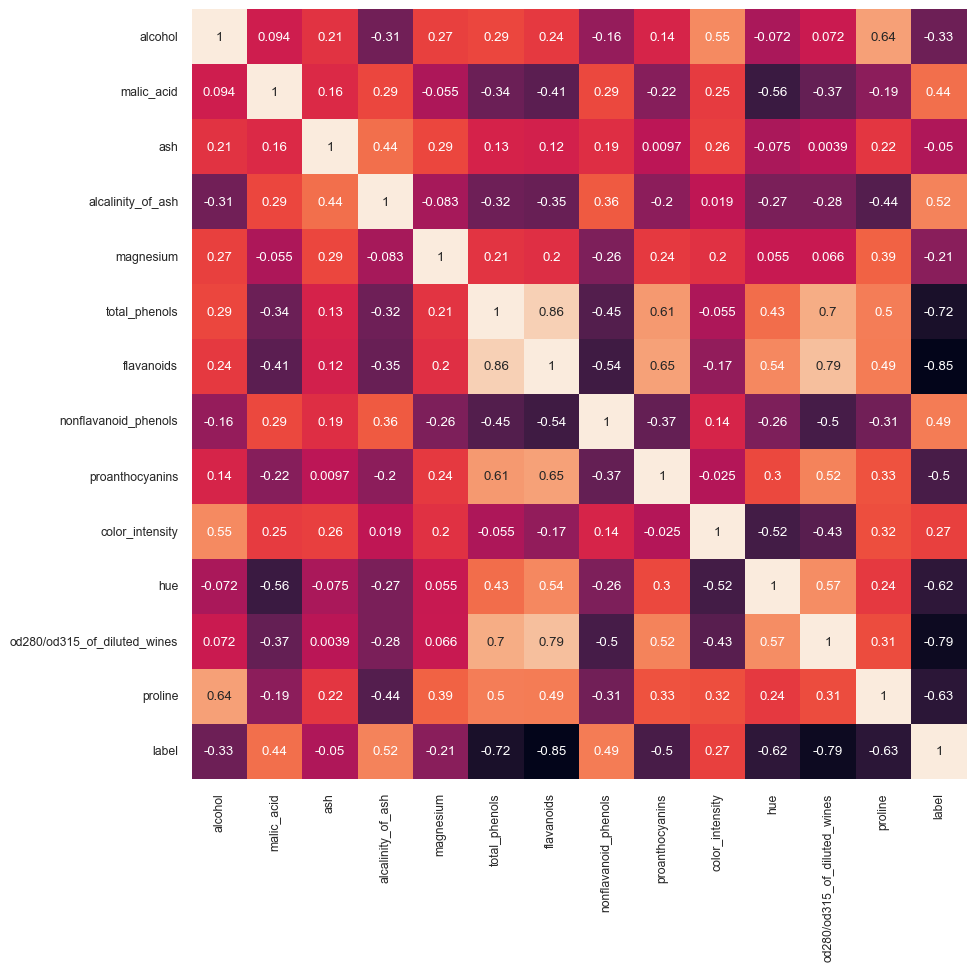

In [27]:
#상관 관계 행렬
df_data=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_data, annot=True, cbar=False)
plt.show()